In [2]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile
#from qiskit.tools.jupyter import *
from qiskit.visualization import *
#from ibm_quantum_widgets import *

# qiskit-ibmq-provider has been deprecated.
# Please see the Migration Guides in https://ibm.biz/provider_migration_guide for more detail.
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options

# Loading your IBM Quantum account(s)
service = QiskitRuntimeService(channel="ibm_quantum")

# Invoke a primitive. For more details see https://qiskit.org/documentation/partners/qiskit_ibm_runtime/tutorials.html
# result = Sampler("ibmq_qasm_simulator").run(circuits).result()

In [3]:
from qiskit import IBMQ

# load IBMQ account
IBMQ.load_account()

from qiskit_ibm_provider import IBMProvider

provider = IBMQ.get_provider(hub="ibm-q", group="open", project="main")

# choose backend
backend = provider.get_backend('ibmq_jakarta')

C:\Users\monitsharma\AppData\Local\Temp\ipykernel_34948\999524057.py:4: DeprecationWarning: The package qiskit.providers.ibmq is being deprecated. Please see https://ibm.biz/provider_migration_guide to get instructions on how to migrate to qiskit-ibm-provider (https://github.com/Qiskit/qiskit-ibm-provider) and qiskit-ibm-runtime (https://github.com/Qiskit/qiskit-ibm-runtime).
  IBMQ.load_account()
C:\Users\monitsharma\AppData\Local\Temp\ipykernel_34948\999524057.py:4: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  IBMQ.load_account()


In [5]:
%pip install qiskit_experiments

     ------------------------------------- 806.6/806.6 kB 12.8 MB/s eta 0:00:00
     ---------------------------------------- 56.8/56.8 kB 3.1 MB/s eta 0:00:00
     ------------------------------------- 187.0/187.0 kB 11.0 MB/s eta 0:00:00
     ---------------------------------------- 98.4/98.4 kB 5.9 MB/s eta 0:00:00
     -------------------------------------- 101.1/101.1 kB 5.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: C:\Users\monitsharma\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [6]:


from qiskit_experiments.library import QuantumVolume

# select physical qubits
qubits = range(4)

# define QV experiment
qv_exp = QuantumVolume(qubits, trials=100)



In [7]:


# run the experiment on the device
expdata = qv_exp.run(backend).block_for_results()



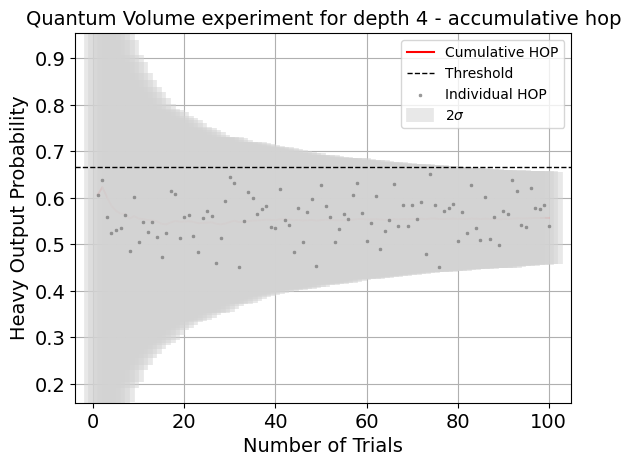

In [8]:
%matplotlib inline
display(expdata.figure(0))

In [9]:
for result in expdata.analysis_results():
    print(result)

AnalysisResult
- name: mean_HOP
- value: 0.56+/-0.05
- quality: bad
- extra: <4 items>
- device_components: ['Q0', 'Q1', 'Q2', 'Q3']
- verified: False
AnalysisResult
- name: quantum_volume
- value: 1
- quality: bad
- extra: <4 items>
- device_components: ['Q0', 'Q1', 'Q2', 'Q3']
- verified: False


In [10]:
for result in expdata.analysis_results():
    print(f"\n{result.name} extra:")
    for key, val in result.extra.items():
        print(f"- {key}: {val}")


mean_HOP extra:
- HOPs: [0.60675, 0.6395, 0.5595, 0.525, 0.5305, 0.53425, 0.56325, 0.48675, 0.60225, 0.5045, 0.5475, 0.52625, 0.549, 0.5155, 0.4725, 0.52375, 0.614, 0.60775, 0.5135, 0.559, 0.56375, 0.5185, 0.4835, 0.556, 0.571, 0.56025, 0.46025, 0.514, 0.594, 0.64425, 0.633, 0.45175, 0.5505, 0.6125, 0.5995, 0.566, 0.5755, 0.58225, 0.5365, 0.53425, 0.62, 0.55275, 0.542, 0.483, 0.57875, 0.5045, 0.56925, 0.59675, 0.453, 0.62675, 0.583, 0.558, 0.50575, 0.53325, 0.566, 0.5555, 0.60675, 0.6325, 0.568, 0.50625, 0.54575, 0.603, 0.49, 0.529, 0.5525, 0.63025, 0.5385, 0.58375, 0.53975, 0.58575, 0.55375, 0.59025, 0.47825, 0.65175, 0.585, 0.451, 0.5725, 0.57775, 0.58675, 0.50675, 0.57, 0.52375, 0.62825, 0.53575, 0.50925, 0.602, 0.512, 0.55925, 0.49775, 0.57075, 0.5645, 0.63875, 0.61475, 0.542, 0.53775, 0.622, 0.57875, 0.57575, 0.58375, 0.5405]
- two_sigma: 0.09935053969531318
- depth: 4
- trials: 100

quantum_volume extra:
- success: False
- confidence: 0.01355829615926718
- depth: 4
- trials: 100

In [11]:
# change number of trials
qv_exp.set_experiment_options(trials = 200)

# run experiment again
expdata2 = qv_exp.run(backend, analysis = None).block_for_results()

# combine data of the two experiments
expdata2.add_data(expdata.data())

# analyze the new joint data
qv_exp.analysis.run(expdata2).block_for_results()

ExperimentData(QuantumVolume, 31e8c870-7981-4b13-af2f-f56ca6565e78, job_ids=['ci6j34tejm3lf1fdtkm0', 'ci6j35tejm3lf1fdtll0', 'circuit-runner_ci6j77giq5ve9j93ib5g_e017_0', 'circuit-runner_ci6j6jn6abdukp2f33dg_0a7a_0'], metadata=<2 items>, figure_names=['QuantumVolume_Fig-0_Exp-31e8c870.svg'])

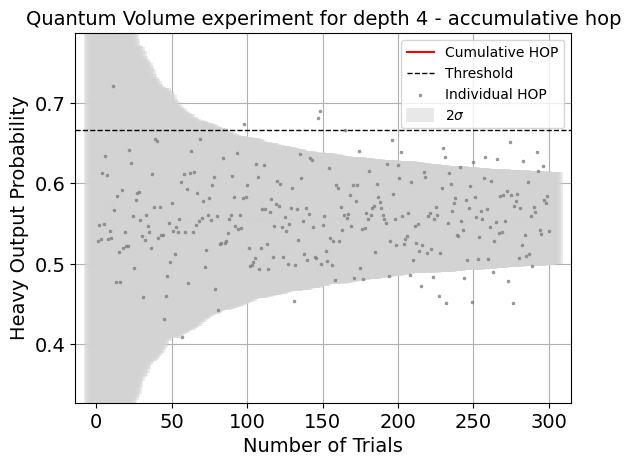

AnalysisResult
- name: mean_HOP
- value: 0.557+/-0.029
- quality: bad
- extra: <4 items>
- device_components: ['Q0', 'Q1', 'Q2', 'Q3']
- verified: False
AnalysisResult
- name: quantum_volume
- value: 1
- quality: bad
- extra: <4 items>
- device_components: ['Q0', 'Q1', 'Q2', 'Q3']
- verified: False


In [12]:


display(expdata2.figure(0))
for result in expdata2.analysis_results():
    print(result)



In [13]:
from qiskit_experiments.framework import BatchExperiment

exps = [QuantumVolume(range(i), trials = 300) for i in range(2,5)]

batch_exp = BatchExperiment(exps)

batch_expdata = batch_exp.run(backend).block_for_results()

In [ ]:


for i in range(batch_exp.num_experiments):
    print(f"\nComponent experiment {i}")
    sub_data = batch_expdata.child_data(i)
    display(sub_data.figure(0))
    for result in sub_data.analysis_results():
        print(result)



In [ ]:
qv_values = [batch_expdata.child_data(i).analysis_results("quantum_volume").value for i in range(batch_exp.num_experiments)]

print(f"Max quantum volume is: {max(qv_values)}")